In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("data/games_clean.csv")

In [3]:
data["FormattedReleaseDate"] = data["ReleaseDate"].map(lambda x: pd.to_datetime(x)) 
data["DayOfYear"] = data["FormattedReleaseDate"].dt.dayofyear
data["AverageHours"] = data["AveragePlaytime"].map(lambda x : x / 60)

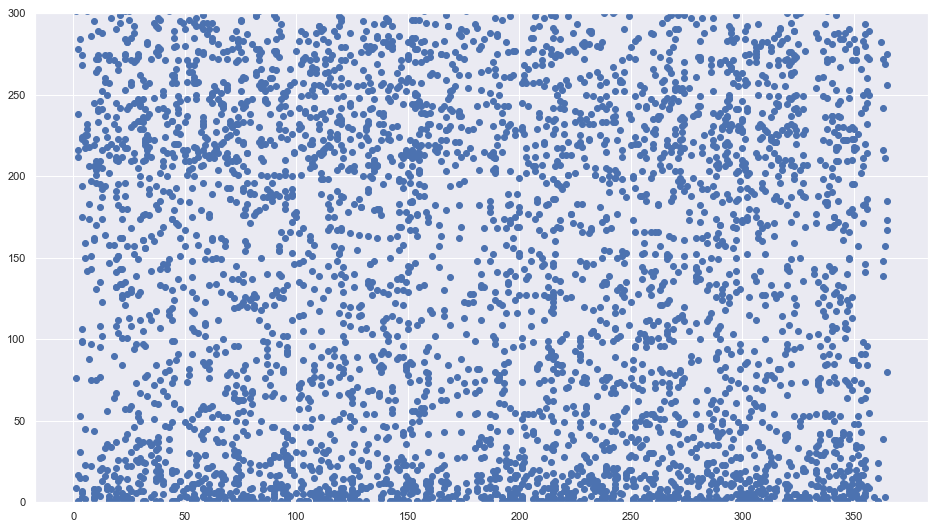

In [12]:
x1 = data["DayOfYear"]
y = data["AveragePlaytime"]
fig, ax = plt.subplots()
plt.scatter(x1,y)
#plt.xlim(1, 366)
plt.ylim(0, 300)
#plt.xlabel("Price", fontsize=20)
#plt.ylabel("Percent Rating", fontsize=20)
#plt.xticks(np.arange(min(x1), 366, 10))
#plt.yticks(np.arange(min(y), max(y)+0.05, 0.05))
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [6]:
x = data.iloc[:, [17,16]]
kmeans = KMeans(10)
kmeans.fit(x)

In [8]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([5, 0, 0, ..., 0, 0, 0])

In [9]:
data_with_clusters = data.copy()
data_with_clusters["Cluster"] = identified_clusters

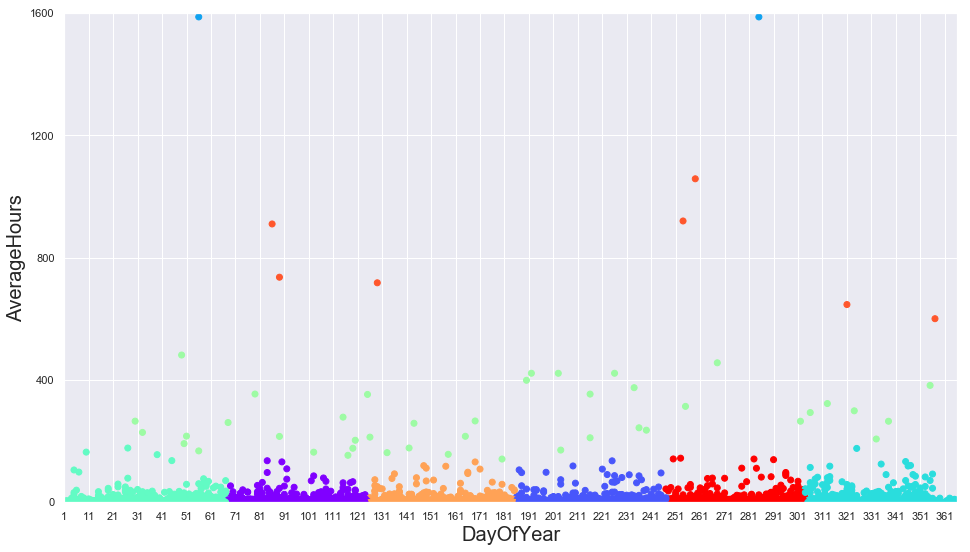

In [10]:
x1 = data_with_clusters["DayOfYear"]
y = data_with_clusters["AverageHours"]
fig, ax = plt.subplots()
plt.scatter(x1,y, c=data_with_clusters["Cluster"], cmap="rainbow")
plt.xlim(1, 366)
plt.ylim(0, 1600)
plt.xlabel("DayOfYear", fontsize=20)
plt.ylabel("AverageHours", fontsize=20)
plt.xticks(np.arange(min(x1), 366, 10))
plt.yticks(np.arange(min(y), 2000, 400))
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

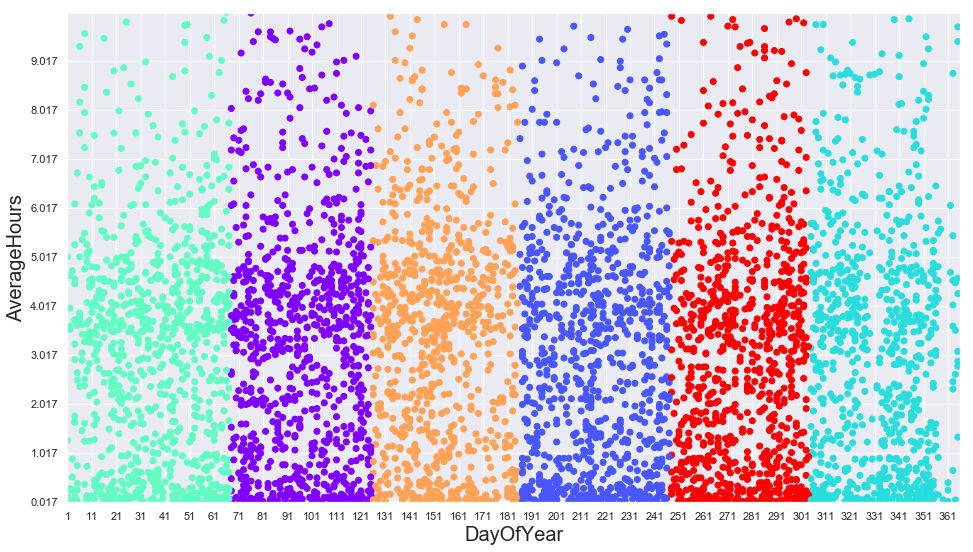

In [11]:
x1 = data_with_clusters["DayOfYear"]
y = data_with_clusters["AverageHours"]
fig, ax = plt.subplots()
plt.scatter(x1,y, c=data_with_clusters["Cluster"], cmap="rainbow")
plt.xlim(1, 366)
plt.ylim(0, 10)
plt.xlabel("DayOfYear", fontsize=20)
plt.ylabel("AverageHours", fontsize=20)
plt.xticks(np.arange(min(x1), 366, 10))
plt.yticks(np.arange(min(y), 10, 1))
plt.rcParams["figure.figsize"] = [16,9]
plt.show()